<a href="https://colab.research.google.com/github/AngelTroncoso/proyecto_telecomx/blob/main/telecoX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto Telecom2 Preveer que clientes tienen mayor probabilidad de cancelar sus servicios**

🎯 Misión  

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.  

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

In [292]:
import pandas as pd

In [293]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [294]:
df_normalizado = pd.json_normalize(df)

In [295]:
df = df[df['Churn'].str.strip() != '']

In [296]:
print(df['Churn'].unique())

['No' 'Yes']


In [297]:
df['Churn'].dtype

dtype('O')

In [298]:
df = pd.json_normalize(df.to_dict(orient='records'))
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [299]:
df.shape


(7043, 21)

In [300]:
rename_dict = {
    'customerID': 'ID_cliente',
    'Churn': 'Cancelado',
    'customer.gender': 'Género',
    'customer.SeniorCitizen': 'Adulto_mayor',
    'customer.Partner': 'Tiene_pareja',
    'customer.Dependents': 'Tiene_dependientes',
    'customer.tenure': 'Antigüedad_meses',

    'phone.PhoneService': 'Servicio_telefonía',
    'phone.MultipleLines': 'Líneas_múltiples',

    'internet.InternetService': 'Servicio_internet',
    'internet.OnlineSecurity': 'Seguridad_en_línea',
    'internet.OnlineBackup': 'Respaldo_en_línea',
    'internet.DeviceProtection': 'Protección_dispositivos',
    'internet.TechSupport': 'Soporte_técnico',
    'internet.StreamingTV': 'TV_en_streaming',
    'internet.StreamingMovies': 'Películas_en_streaming',

    'account.Contract': 'Tipo_contrato',
    'account.PaperlessBilling': 'Factura_sin_papel',
    'account.PaymentMethod': 'Método_pago',
    'account.Charges.Monthly': 'Cargo_mensual',
    'account.Charges.Total': 'Cargo_total'
}

In [301]:
df = df.rename(columns=rename_dict)

In [302]:
df.shape

(7043, 21)

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_cliente               7043 non-null   object 
 1   Cancelado                7043 non-null   object 
 2   Género                   7043 non-null   object 
 3   Adulto_mayor             7043 non-null   int64  
 4   Tiene_pareja             7043 non-null   object 
 5   Tiene_dependientes       7043 non-null   object 
 6   Antigüedad_meses         7043 non-null   int64  
 7   Servicio_telefonía       7043 non-null   object 
 8   Líneas_múltiples         7043 non-null   object 
 9   Servicio_internet        7043 non-null   object 
 10  Seguridad_en_línea       7043 non-null   object 
 11  Respaldo_en_línea        7043 non-null   object 
 12  Protección_dispositivos  7043 non-null   object 
 13  Soporte_técnico          7043 non-null   object 
 14  TV_en_streaming         

In [304]:
df.isnull().sum()

,0
ID_cliente,0
Cancelado,0
Género,0
Adulto_mayor,0
Tiene_pareja,0
Tiene_dependientes,0
Antigüedad_meses,0
Servicio_telefonía,0
Líneas_múltiples,0
Servicio_internet,0


In [305]:
df['Cargo_total'] = df['Cargo_total'].str.replace(',', '.', regex=False)

In [306]:
df['Cargo_total'] = pd.to_numeric(df['Cargo_total'], errors='coerce')

In [307]:
df.head()

,ID_cliente,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,...,Respaldo_en_línea,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [308]:
df.dtypes

,0
ID_cliente,object
Cancelado,object
Género,object
Adulto_mayor,int64
Tiene_pareja,object
Tiene_dependientes,object
Antigüedad_meses,int64
Servicio_telefonía,object
Líneas_múltiples,object
Servicio_internet,object


In [309]:
for col in df.columns:
    print(f"\n📌 Columna: {col}")
    print(df[col].unique())


📌 Columna: ID_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

📌 Columna: Cancelado
['No' 'Yes']

📌 Columna: Género
['Female' 'Male']

📌 Columna: Adulto_mayor
[0 1]

📌 Columna: Tiene_pareja
['Yes' 'No']

📌 Columna: Tiene_dependientes
['Yes' 'No']

📌 Columna: Antigüedad_meses
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

📌 Columna: Servicio_telefonía
['Yes' 'No']

📌 Columna: Líneas_múltiples
['No' 'Yes' 'No phone service']

📌 Columna: Servicio_internet
['DSL' 'Fiber optic' 'No']

📌 Columna: Seguridad_en_línea
['No' 'Yes' 'No internet service']

📌 Columna: Respaldo_en_línea
['Yes' 'No' 'No internet service']

📌 Columna: Protección_dispositivos
['No' 'Yes' 'No internet service']

📌 Columna: Soporte_técnico
['Yes' 'No' 'No internet service']

📌 Columna: TV_en_streaming

In [310]:
df['Cancelado'].value_counts(dropna=False)

,count
Cancelado,
No,5174
Yes,1869


In [311]:
df['Género'].value_counts(dropna=False)

,count
Género,
Male,3555
Female,3488


In [312]:
#Asumimos 30 días promedio por mes:
df['Cuentas_Diarias'] = df['Cargo_mensual'] / 30

In [313]:
#validación rápida
print(df[['Cargo_mensual', 'Cuentas_Diarias']].head())

   Cargo_mensual  Cuentas_Diarias
0           65.6         2.186667
1           59.9         1.996667
2           73.9         2.463333
3           98.0         3.266667
4           83.9         2.796667


In [314]:
#Resumen estadístico
df['Cuentas_Diarias'].describe()

,Cuentas_Diarias
count,7043.000000
mean,2.158723
std,1.003002
min,0.608333
25%,1.183333
50%,2.345000
75%,2.995000
max,3.958333


In [315]:
df.head()

,ID_cliente,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,...,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


#2.Transformar datos para Machine Learning

In [316]:
#separar datos tipos object y darle una variable de asignacion para extración con cikitlearn
obj_cols = df.select_dtypes(include='object').columns
print("Columnas tipo object:\n", obj_cols)

Columnas tipo object:
 Index(['ID_cliente', 'Cancelado', 'Género', 'Tiene_pareja',
       'Tiene_dependientes', 'Servicio_telefonía', 'Líneas_múltiples',
       'Servicio_internet', 'Seguridad_en_línea', 'Respaldo_en_línea',
       'Protección_dispositivos', 'Soporte_técnico', 'TV_en_streaming',
       'Películas_en_streaming', 'Tipo_contrato', 'Factura_sin_papel',
       'Método_pago'],
      dtype='object')


In [317]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in obj_cols:
    try:
        df[col] = le.fit_transform(df[col])
    except:
        print(f"No se pudo transformar: {col}")

In [318]:
df.nunique()

,0
ID_cliente,7043
Cancelado,2
Género,2
Adulto_mayor,2
Tiene_pareja,2
Tiene_dependientes,2
Antigüedad_meses,73
Servicio_telefonía,2
Líneas_múltiples,3
Servicio_internet,3


In [328]:
df.head()

,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,Seguridad_en_línea,...,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total,Cuentas_Diarias
0,0,0,0,1,1,9,1,0,0,0,...,0,2,2,0,1,1,3,65.6,593.30,2.186667
1,0,1,0,0,0,9,1,2,0,0,...,0,0,0,2,0,0,3,59.9,542.40,1.996667
2,1,1,0,0,0,4,1,0,1,0,...,2,0,0,0,0,1,2,73.9,280.85,2.463333
3,1,1,1,1,0,13,1,0,1,0,...,2,0,2,2,0,1,2,98.0,1237.85,3.266667
4,1,0,1,1,0,3,1,0,1,0,...,0,2,2,0,0,1,3,83.9,267.40,2.796667


In [320]:
df.describe()

,ID_cliente,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,...,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,3521.000000,0.265370,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,2.158723
std,2033.283305,0.441561,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,401.450000,1.183333
50%,3521.000000,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,2.345000
75%,5281.500000,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,2.995000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,3.958333


In [321]:
df.dtypes

,0
ID_cliente,int64
Cancelado,int64
Género,int64
Adulto_mayor,int64
Tiene_pareja,int64
Tiene_dependientes,int64
Antigüedad_meses,int64
Servicio_telefonía,int64
Líneas_múltiples,int64
Servicio_internet,int64


#**Correlacion de Pearson**

In [322]:
df = df.drop("ID_cliente",axis=1)

In [323]:
df

,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,Seguridad_en_línea,...,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total,Cuentas_Diarias
0,0,0,0,1,1,9,1,0,0,0,...,0,2,2,0,1,1,3,65.60,593.30,2.186667
1,0,1,0,0,0,9,1,2,0,0,...,0,0,0,2,0,0,3,59.90,542.40,1.996667
2,1,1,0,0,0,4,1,0,1,0,...,2,0,0,0,0,1,2,73.90,280.85,2.463333
3,1,1,1,1,0,13,1,0,1,0,...,2,0,2,2,0,1,2,98.00,1237.85,3.266667
4,1,0,1,1,0,3,1,0,1,0,...,0,2,2,0,0,1,3,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,13,1,0,0,2,...,0,2,0,0,1,0,3,55.15,742.90,1.838333
7039,1,1,0,1,0,22,1,2,1,0,...,0,0,0,2,0,1,2,85.10,1873.70,2.836667
7040,0,1,0,0,0,2,1,0,0,0,...,0,0,0,0,0,1,3,50.30,92.75,1.676667
7041,0,1,0,1,1,67,1,0,0,2,...,2,2,0,2,2,0,3,67.85,4627.65,2.261667


In [324]:
correlacion = df.corr()
correlacion

,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,Seguridad_en_línea,...,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total,Cuentas_Diarias
Cancelado,1.000000,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.038037,-0.047291,-0.289309,...,-0.178134,-0.282492,-0.036581,-0.038492,-0.396713,0.191825,0.107062,0.193356,-0.199484,0.193356
Género,-0.008612,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.014569
Adulto_mayor,0.150889,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102411,0.220173
Tiene_pareja,-0.150448,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.319072,0.096848
Tiene_dependientes,-0.164221,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064653,-0.113890
Antigüedad_meses,-0.352229,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825880,0.247900
Servicio_telefonía,0.011942,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113008,0.247398
Líneas_múltiples,0.038037,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.453202,0.433576
Servicio_internet,-0.047291,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175691,-0.323260
Seguridad_en_línea,-0.289309,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254473,-0.053878


In [325]:
correlacion["Cancelado"]

,Cancelado
Cancelado,1.000000
Género,-0.008612
Adulto_mayor,0.150889
Tiene_pareja,-0.150448
Tiene_dependientes,-0.164221
Antigüedad_meses,-0.352229
Servicio_telefonía,0.011942
Líneas_múltiples,0.038037
Servicio_internet,-0.047291
Seguridad_en_línea,-0.289309


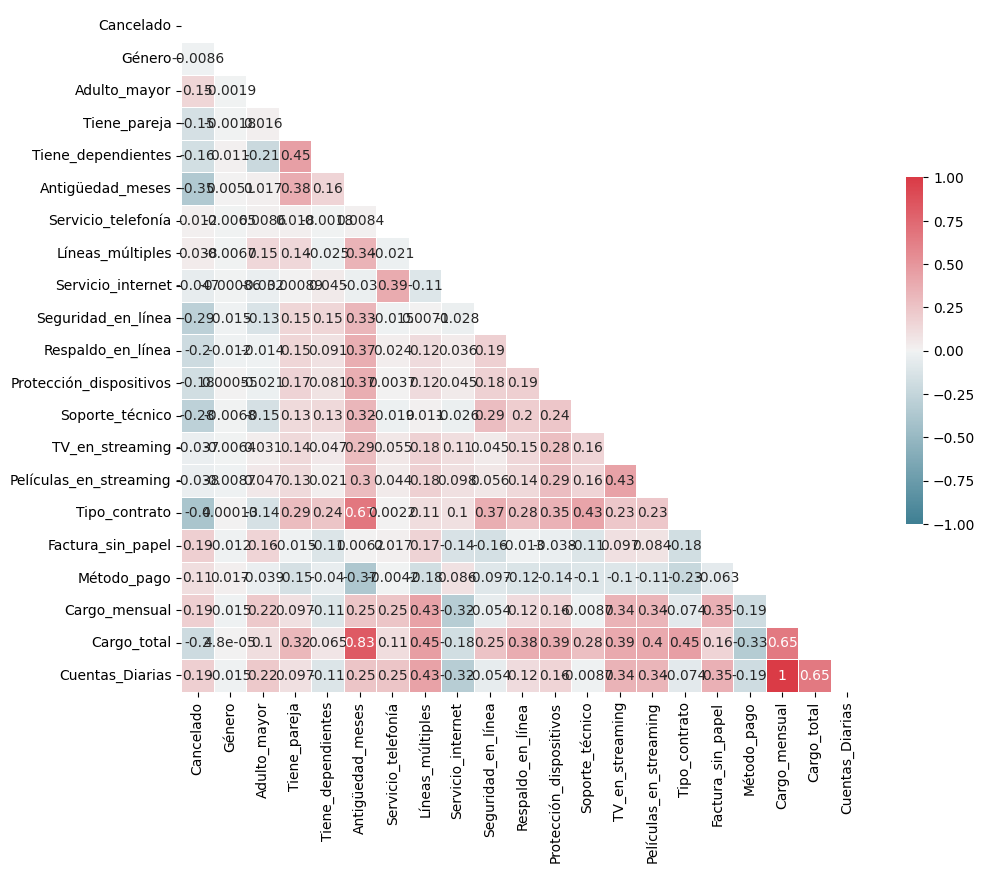

In [327]:
# Actividad
# Cuáles factores están más correlacionados?
# Actividad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ya tenemos los datos en el DataFrame df, no necesitamos leer un CSV
# Correlación
corr = df.corr(numeric_only=True)

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

#Variables más correlacionadas con "Cancelado":  

##Correlaciones negativas fuertes (factores protectores):  
Tipo_contrato: -0.397 (La más fuerte - contratos largos protegen del abandono)  
Antigüedad_meses: -0.352 (Clientes antiguos cancelan menos)  
Seguridad_en_línea: -0.289 (Tener seguridad reduce abandono)  
Soporte_técnico: -0.282 (Soporte técnico es protector)  
Cargo_total: -0.199 (Sorprendentemente, mayor cargo total = menos cancelación)  

##Correlaciones positivas (factores de riesgo):  
Cargo_mensual: 0.193 (Cargos mensuales altos aumentan abandono)  
Cuentas_Diarias: 0.193 (Igual valor que cargo mensual)  
Factura_sin_papel: 0.192 (Facturación digital se asocia con más abandono)  
Tiene_dependientes: -0.164 (Tener dependientes es protector)  
Adulto_mayor: 0.151 (Adultos mayores tienden a cancelar más)  

##Insights importantes:  
Contratos a largo plazo son el factor protector más fuerte  
Paradoja del cargo: Mayor cargo total (acumulativo) = menos abandono, pero mayor cargo mensual = más abandono  
Servicios adicionales (seguridad, soporte) actúan como "pegamento" para retener clientes  
La antigüedad es clave: mientras más tiempo lleva un cliente, menos probable que cancel  

#**Separando datos para entrenamiento y para prueba**

In [342]:
# Importar librerías necesarias
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# import matplotlib.pyplot as plt
# import seaborn as sn

##1. PREPARACIÓN DE DATOS

In [337]:
# import train_test_split
from sklearn.model_selection import train_test_split

y = df['Cancelado']

# Seleccionar variables predictoras basadas en el análisis de correlación
variables_importantes = [
    'Tipo_contrato',        # Correlación: -0.397 (más importante)
    'Antigüedad_meses',     # Correlación: -0.352
    'Seguridad_en_línea',   # Correlación: -0.289
    'Soporte_técnico',      # Correlación: -0.282
    'Cargo_mensual',        # Correlación: 0.193
    'Factura_sin_papel',    # Correlación: 0.192
    'Adulto_mayor',         # Correlación: 0.151
    'Tiene_dependientes',   # Correlación: -0.164
    'Respaldo_en_línea',    # Correlación: -0.196
    'Protección_dispositivos' # Correlación: -0.178
]

## 2. DIVISIÓN DE DATOS

In [338]:
X = df[variables_importantes]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230,stratify=y)#garantizar la reproductibilidad de la segregación de los datos
print(f"\nDivisión de datos:")
print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")
print(f"Proporción de cancelaciones en entrenamiento: {y_train.mean():.3f}")
print(f"Proporción de cancelaciones en prueba: {y_test.mean():.3f}")


División de datos:
Entrenamiento: 4930 muestras
Prueba: 2113 muestras
Proporción de cancelaciones en entrenamiento: 0.265
Proporción de cancelaciones en prueba: 0.265


##3. PREPROCESAMIENTO

In [336]:
from sklearn.preprocessing import StandardScaler

# Escalar variables numéricas (importante para regresión logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. MODELO DE REGRESIÓN LOGÍSTICA

In [340]:
from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo
modelo = LogisticRegression(
    random_state=230,
    max_iter=1000,
    solver='liblinear'  # Bueno para datasets pequeños-medianos
)

# Entrenar el modelo
modelo.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=230, solver='liblinear')

## 5. PREDICCIONES Y EVALUACIÓN

In [343]:
y_pred = modelo.predict(X_test_scaled)
y_pred_proba = modelo.predict_proba(X_test_scaled)[:, 1]

# Métricas de evaluación
print("\n" + "="*50)
print("RESULTADOS DEL MODELO")
print("="*50)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print(f"\nAUC-ROC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")

# Matriz de confusión
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


RESULTADOS DEL MODELO

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1552
           1       0.65      0.58      0.61       561

    accuracy                           0.80      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.80      0.80      2113


AUC-ROC Score: 0.848

Matriz de Confusión:
[[1377  175]
 [ 238  323]]


## 6. ANÁLISIS DE IMPORTANCIA DE VARIABLES

In [344]:
print("\n" + "="*50)
print("IMPORTANCIA DE VARIABLES")
print("="*50)

# Coeficientes del modelo (importancia)
coeficientes = pd.DataFrame({
    'Variable': variables_importantes,  # o X.columns si usas todas
    'Coeficiente': modelo.coef_[0],
    'Importancia_Abs': np.abs(modelo.coef_[0])
}).sort_values('Importancia_Abs', ascending=False)

print(coeficientes)


IMPORTANCIA DE VARIABLES
                  Variable  Coeficiente  Importancia_Abs
1         Antigüedad_meses    -0.754159         0.754159
4            Cargo_mensual     0.695218         0.695218
0            Tipo_contrato    -0.622066         0.622066
3          Soporte_técnico    -0.257738         0.257738
2       Seguridad_en_línea    -0.203163         0.203163
5        Factura_sin_papel     0.186755         0.186755
8        Respaldo_en_línea    -0.113918         0.113918
7       Tiene_dependientes    -0.099829         0.099829
6             Adulto_mayor     0.089854         0.089854
9  Protección_dispositivos     0.008186         0.008186


## 7. VISUALIZACIONES

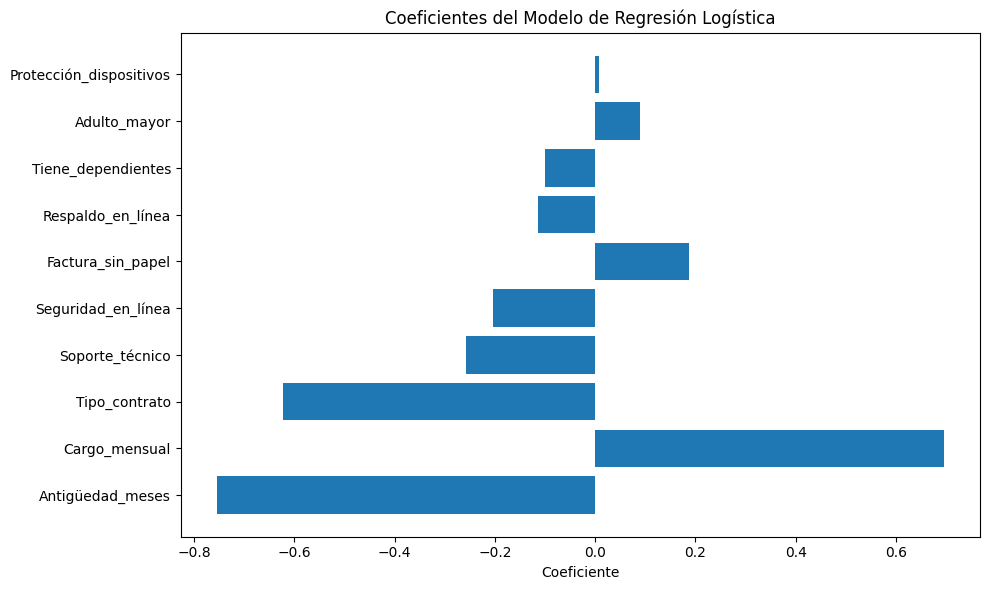

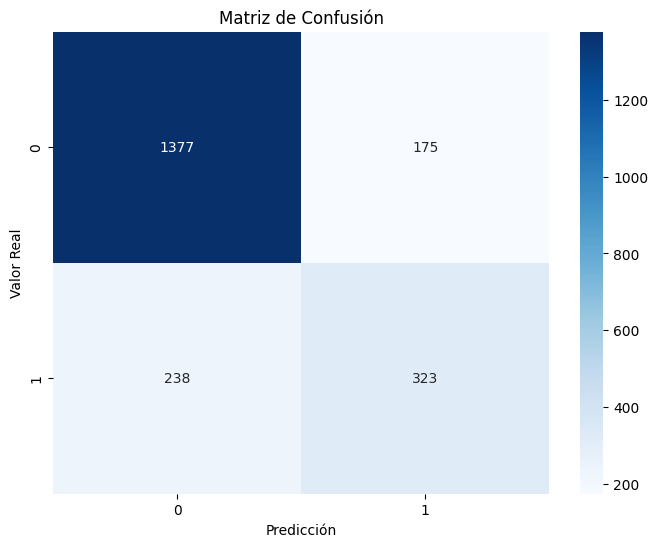

In [346]:
# Gráfico de importancia de variables
plt.figure(figsize=(10, 6))
plt.barh(coeficientes['Variable'], coeficientes['Coeficiente'])
plt.title('Coeficientes del Modelo de Regresión Logística')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()

# Gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.show()

## 8. PREDICCIÓN EN NUEVOS DATOS

In [347]:
def predecir_abandono(nuevos_datos):
    """
    Función para predecir abandono en nuevos clientes

    Args:
        nuevos_datos: DataFrame con las mismas columnas que X_train

    Returns:
        probabilidades de abandono
    """
    nuevos_datos_scaled = scaler.transform(nuevos_datos)
    probabilidades = modelo.predict_proba(nuevos_datos_scaled)[:, 1]
    return probabilidades

# Ejemplo de uso:
# prob_abandono = predecir_abandono(nuevos_clientes_df)
# print(f"Probabilidad de abandono: {prob_abandono}")

print("\n" + "="*50)
print("MODELO ENTRENADO EXITOSAMENTE")
print("="*50)
print("El modelo está listo para predecir la probabilidad de abandono de nuevos clientes.")


MODELO ENTRENADO EXITOSAMENTE
El modelo está listo para predecir la probabilidad de abandono de nuevos clientes.
